In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchmetrics import Accuracy

import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import torchvision.transforms.functional as f_vision

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|██████████| 170498071/170498071 [01:31<00:00, 1865473.81it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
train_batch = 32
test_batch = 20
train_loader = DataLoader(cifar_trainset, batch_size=train_batch, shuffle=True, num_workers=2)
test_loader = DataLoader(cifar_testset, batch_size=test_batch, shuffle=False, num_workers=2)

In [6]:
torch.manual_seed(42)
plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = f_vision.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

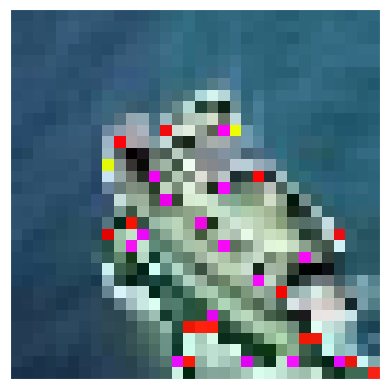

In [21]:
#check train batch
for x_train, y_train in train_loader:
    break
show(x_train[0])